# The numpy.ramdom package

### Programming for Data Analysis assessment 2019

## 1. Introduction
In this notebook I will explain the use of the numpy.random package in Python. It is organized into four distinct sections, each corresponding to a specific task as outlined in the assignment document. The accompanying README summarizes the findings of this investigation.

### Preliminaries

In [1]:
# Import required packages.
import matplotlib.pyplot as plt
import numpy as np
import math as m

# matplotlib settings.
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

***
## 2. The purpose of the numpy.random package

The numpy.random package is a group of functions that allow for efficient and fast generation of arrays containing samples of random numbers; these sample values can be drawn from many different types of probability distribution.

***
## 3. Simple random data and Permutations

### 3.1 Simple random data

This part of the numpy.random package comprises a group of functions which are capable of generating some basic random number samples. They include:
- rand
- randn
- random_integers
- random_sample
- choice
- bytes

The very first function **rand** generates random numbers from a uniform distribution, in the interval $[0.0, 1.0)$. A uniform distribution implies that all numbers in the interval are equally likely to be picked. The interval as written here includes 0 but not 1. The random numbers can be generated in an array of specified size, or singly if no array size given.

In [2]:
# Generate a single random number.
np.random.rand()

0.9985197030737645

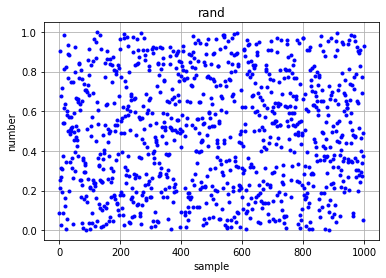

In [3]:
# Generate an array of random numbers, array size given as a parameter.
x1 = np.random.rand(1000)
plt.plot(x1, 'b.')
plt.title('rand')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how the random numbers generated fill the range 0 to 1. 


Compare this with generating numbers from a different type of distribution, the standard normal distribution of mean 0 and variance 1, using **randn**. The mean is the average value. The variance measures now far the numbers are spread out from the mean in the distribution. 

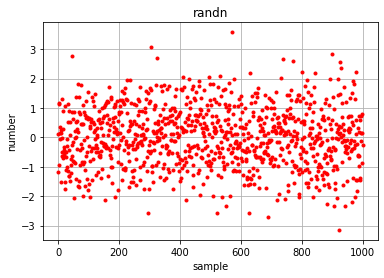

In [4]:
# Return numbers from a standard normal distribution with mean 0 and variance 1.
x2 = np.random.randn(1000)
plt.plot(x2, 'r.')
plt.title('randn')
plt.xlabel('sample')
plt.ylabel('number')
plt.grid()

Notice how these numbers are more bunched around zero, which is the default mean for randn.

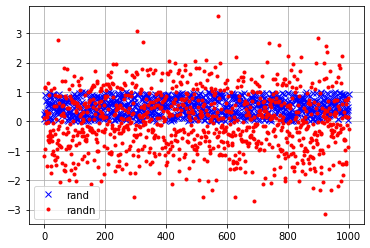

In [5]:
# Compare the two functions just used in a scatterplot.
plt.plot(x1, 'bx', label='rand')
plt.plot(x2, 'r.', label='randn')
plt.grid()
plt.legend()

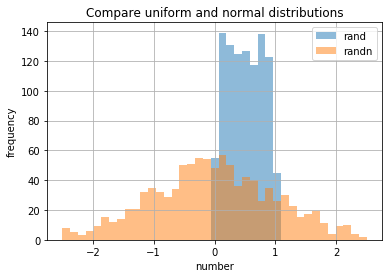

In [6]:
# Compare the two functions just used using histograms.
bins = np.linspace(-2.5, 2.5, 40)
plt.hist(np.random.rand(1000), bins, alpha=0.5, label='rand')
plt.hist(np.random.randn(1000), bins, alpha=0.5, label='randn')
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Compare uniform and normal distributions')
plt.grid()
plt.legend(loc='upper right')

Once again notice how the generated numbers lie within a range and all have the same chance of being sampled when using **rand**. In contrast, the **randn** function generates numbers with a spread, so that numbers around the specified mean have highest frequency. We can manipulate the latter distribution to look more like the former by playing around with the parameters; shrink the variance to reduce the spread and offset the sample by the mean. The numbers are now drawn from a normal distribution $N(\mu, \sigma^2)$, where $\mu$ is the mean, $\sigma^2$ is the variance, and $\sigma$ is the standard deviation.

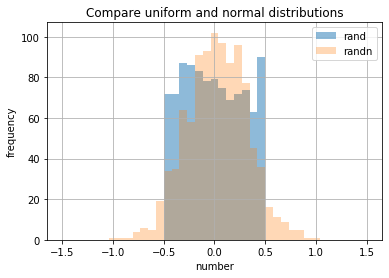

In [7]:
# Modify randn pars to shrink the spread and offset rand to have mean 0.
mu, sigma = 0.5, 0.3
bins = np.linspace(-1.5, 1.5, 40)
plt.hist(np.random.rand(1000) - mu, bins, alpha=0.5, label='rand') # mean 0.5
plt.hist(sigma * np.random.randn(1000), bins, alpha=0.3, label='randn') # mean = 0, variance 0.3
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Compare uniform and normal distributions')
plt.grid()
plt.legend(loc='upper right')

The package contains two functions for generating random integers, **randint** and **random_integers**. The documentation states that **random_integers** has been deprecated so we will only discuss **rantint**, which generates random integers in the interval $[low, high)$. Eg. of use?

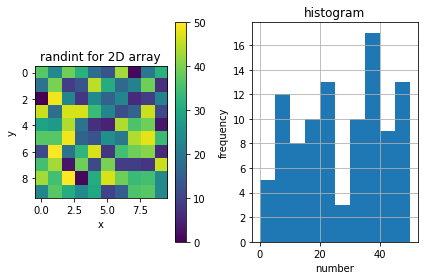

In [8]:
# Return a 10x10 array of random integers from low (inclusive) to high (exclusive).
high = 51; low = 0
a = np.random.randint(low, high, size=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('randint for 2D array')

# np.reshape() to straighten array
plt.subplot(1, 2, 2)
b = np.reshape(a, 100)
plt.hist(b)
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('histogram')
plt.grid()

plt.tight_layout()

This function can be used to simulate rolling a six-sided die or tossing a fair coin. The die roll has 6 possible outcomes (the numbers 1 to 6) while the coin toss has only two (heads or tails represented by 1 and 0). 

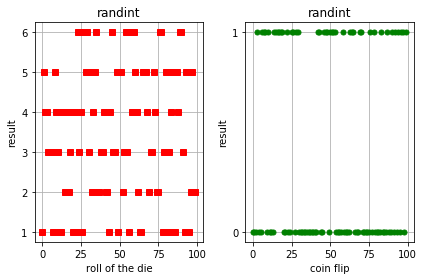

In [9]:
# Roll of a die.
d1 = np.random.randint(1, 7, 100)

plt.subplot(1, 2, 1)
plt.plot(d1, 'rs')
plt.title('randint')
plt.xlabel('roll of the die')
plt.ylabel('result')
plt.grid()

# Coin flip.
c1 = np.random.randint(0, 2, 100)

plt.subplot(1, 2, 2)
plt.plot(c1, 'go', markersize=5)
plt.title('randint')
plt.xlabel('coin flip')
plt.ylabel('result')
plt.grid()
plt.yticks(np.arange(2))

plt.tight_layout()

There are a number of functions which, on first glance, appear to do the same thing. Indeed, they (**random, ranf, sample**) are all aliases to the function **random_sample**. This function generates random floating point numbers in the half open interval $[0.0, 1.0)$. The numbers are drawn from a continuous uniform distribution.

In [10]:
# 2 x 5 array of random floats.
np.random.random_sample((2,5))

array([[0.53362164, 0.7730619 , 0.76045188, 0.94591988, 0.72378979],
       [0.3725304 , 0.19469272, 0.46405324, 0.39331722, 0.24128042]])

For example , if I wanted to use some of these functions to pick my Euromillions numbers, I might naively think to use the **randint** function. However, we need to be careful because this function allows for any number in the range to be chosen more than one time. This possibility for repetition would not necessarily be obvious on picking just five numbers. However, if the sample size is larger the repeated integers become visible. The correct function to use here would be **choice** with the replace keyword set to False. This function generates a random sample of specified size from a 1D array. The array does not have to contain integers, it could contain a list of names for example. 

In [11]:
# Return 5 random integers from low (inclusive) to high (exclusive); here [0,51)
np.random.randint(51, size=20)

array([43, 50, 33, 45, 32, 15, 11, 47,  6, 43, 19,  4, 23,  9, 13, 28, 38,
       20, 32, 32])

In [12]:
# Randomly select 20 numbers from a list, once a number is picked it can't be chosen again.
np.arange(1, 51) # list of integers from 1 to 50
np.random.choice(np.arange(1, 51), 20, replace=False)

array([22, 24, 13,  5, 41, 15, 30, 46, 14, 34, 40,  6, 17,  1, 28, 21, 20,
       43, 42, 36])

The last function in this part of the package is **bytes**, which returns a number of random bytes.

In [13]:
# Return 5 random bytes.
np.random.bytes(5)

b'\x8bfwwI'

### 3.2 Permutations

A permutation is the particular order of a set of elements. The functions in this part of the package allow one to re-order lists and arrays; they are:
- shuffle
- permutation

**shuffle** shuffles the contents of an array or a list. If the array has 2 dimensions, this function shuffles the rows but the order of the elements in each row are *not* changed by the process. Beware, the list itself is modified by the process of shuffling.

In [14]:
# Shuffle a simple list.
x = np.arange(15) # list
print("original list", x)
np.random.shuffle(x) # shuffle it
print("shuffled list", x)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shuffled list [ 8  5  0  7  4  3  9 11 14  1 13 10 12  6  2]


In [15]:
# Shuffle a 2D array.
y = np.arange(15).reshape(3,5) # transform list to array
print("original array\n", y)
np.random.shuffle(y) # shuffle it
print("shuffled array\n", y)

original array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shuffled array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


Notice here how the order of the rows is changed, but the order of elements in each row is not. If the array has higher dimension than 2, then it is only the first dimension that is shuffled. What could this be used for?

The **permutation** function appears to do the exact same thing on first glance. However, on closer inspection, I realized that it leaves the original list/array intact. The list to be shuffled is passed to the function as an integer and the function computes the list from the supplied integer using np.arange(int). For arrays, it shuffles the first dimension of a multi-dimensional array in the same was as **shuffle** does, but uses a copy of the array.

In [16]:
# Permute a simple list.
print("original list", np.arange(20))
z = np.random.permutation(20) # shuffle it
print("shuffled list", z)

original list [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
shuffled list [ 9  7  2 19 18  4 17 11 13 15  8 10  1 12  5  3 14  0 16  6]


In [17]:
# Permute a 2D array.
y = np.arange(24).reshape(6,-1) # 2d array (-1 means 2nd dim calculated)
print("original array\n", y)
print("shuffled array\n", np.random.permutation(y)) # shuffle a copy of it.

original array
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
shuffled array
 [[ 8  9 10 11]
 [ 0  1  2  3]
 [20 21 22 23]
 [12 13 14 15]
 [ 4  5  6  7]
 [16 17 18 19]]


***
## 4. Distribution functions

There are over 30 functions for generating random samples from probability distributions in the numpy.random package. We will only discuss a few here.

- normal
- binomial
- exponential
- next
- next
- maybe another

### 4.1 The normal distribution

*np.random.normal(loc=0.0,scale=1.0,size=None)*

The **normal** function is used to generate random samples from a normal (or Gaussian) distribution. Here, *loc* is the mean of the distribution, *scale* is the standard deviation or spread; default values are given. It occurs very often in nature, and has been used many times in this H. Dip. course to simulate the addition of noise or variation to a set of 'perfect' data. It is an example of a continuous statistical distribution.

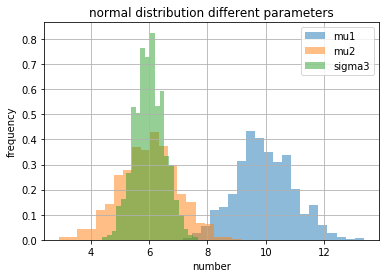

In [18]:
# Generate an array of n random numbers from a Normal distribution of mean mu, variance sigma. 
mu1, sigma1 = 10, 1
n1 = np.random.normal(mu1, sigma1, 1000)
plt.hist(n1, bins=20, density=True, alpha=0.5, label='mu1') # density=True normalizes the histogram

# Different mean.
mu2, sigma2 = 6, 1
n2 = np.random.normal(mu2, sigma2, 1000)
plt.hist(n2, bins=20, density=True, alpha=0.5, label='mu2')

# Different sigma.
sigma3 = 0.5
n3 = np.random.normal(mu2, sigma3, 1000)
plt.hist(n3, bins=20, density=True, alpha=0.5, label='sigma3')

plt.xlabel('number')
plt.ylabel('frequency')
plt.title('normal distribution different parameters')
plt.legend()
plt.grid()

We can plot the probability density function for this distribution on top of the histogram of values. The probability density function (PDF) is a mathematical function describing the probability that a particular value will occur. It describes the population from which the sample values are drawn. As larger numbers of samples are generated, the resulting histogram of sample values more closely resembles the PDF. The PDF for a normal distribution of a variable $x$ (mean $\mu$, standard deviation $\sigma$) is given by:
$$P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2/(2\sigma^2)}$$

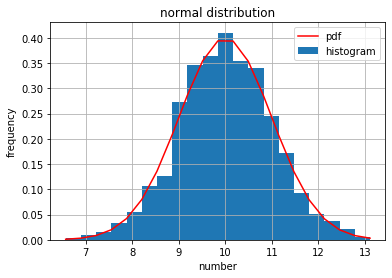

In [19]:
# Generate the sample values.
n1 = np.random.normal(mu1, sigma1, 1000)
count, bins, ignored = plt.hist(n1, 20, density=True, label='histogram')

# Calculate the PDF over same range. 
# density=True above allows comparison with pdf
norm_pdf = lambda mu, s, x: 1/(s * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * s**2) )
plt.plot(bins, norm_pdf(mu1, sigma1, bins), color='r', label='pdf')

plt.title('normal distribution')
plt.xlabel('number')
plt.ylabel('frequency')
plt.legend()
plt.grid()

### 4.2 The binomial distribution

*np.random.binomial(n,p,size=None)*

This function generates random samples from a binomial distribution, which describes the probability of obtaining a number of success from *n* trials. *n* is an integer with $n \geq 0$ and *p* is the probability of success for each trial; it lies in the interval [0,1]. The flipping of a fair coin can be simulated with this function: the result of one flip doesn't influence any of the other, and for each flip there is a 50% chance of a head (and therefore a 50% chance of a tail because the sum of probabilities for all possible outcomes must equal 1). The variables in a binomial distribution can only have discrete values (H or T for example). A binomial experiment must have:

- repeated trials,
- two possible outcomes for each trial,
- the probability of success is constant,
- all trials are independent.

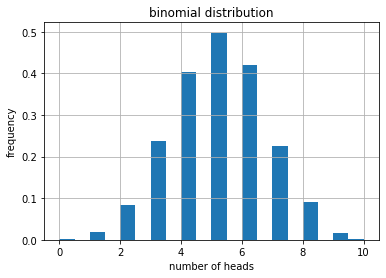

In [20]:
# Flip a fair coin 10 times. 
p, n = 0.5, 10

# Repeat the test many times.
rep = 10000

b1 = np.random.binomial(n, p, rep)
count, bins, ignored = plt.hist(b1, 20, density=True, label='histogram')
#plt.hist(b1)
plt.xlabel('number of heads')
plt.ylabel('frequency')
plt.title('binomial distribution')
plt.grid()

What does this histogram tell us? That if we do an experiment to flip a fair coin a fixed number of times, and repeat the trial many times, the most likely outcome is heads half the time. How often does that actually occur? We can use the PDF to calculate the probability of obtaining a specified number (x) of heads out of n flips.
$$P(x) = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}$$

In [21]:
# In our experiment count how many times 5 heads actually occurs.
print("For {} trials, probability {}, repeated {} times:".format(n, p, rep))
h = 5
sum(np.random.binomial(n, p, rep) == h)/rep

For 10 trials, probability 0.5, repeated 10000 times:


0.2513

In [22]:
# What do we expect from pdf above?
print("P(5 heads) = ")
(m.factorial(n)/(m.factorial(h) * m.factorial(n - h))) * (p ** h) * (1-p) ** h

P(5 heads) = 


0.24609375

### 4.3 The exponential distribution

*np.random.exponential(scale=1, size=None)*

Generate an array (size) of random samples from an exponential distribution with specified scale parameter $\beta$. The scale parameter is the inverse of the rate parameter $\lambda$ which is sometimes used instead, $1/\beta = \lambda$. It is a continuous distribution used to model the time we must wait before an event occurs. For example, ... Also decay. The PDF for an exponential distribution (for $x>0$), of scale factor $\beta$, is given by:
$$P(x) = \frac{1}{\beta} e^{-x/\beta}$$

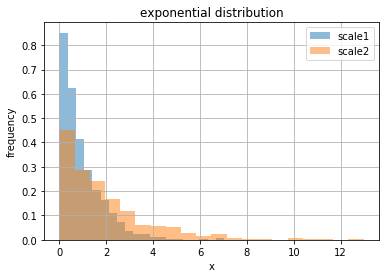

In [23]:
# 1000 samples from exp distribution with scale
scale1, scale2 = 1, 2
e1 = np.random.exponential(scale1, 1000)
e2 = np.random.exponential(scale2, 1000)
count, bins, ignored = plt.hist(e1, 20, alpha=0.5, density=True, label='scale1')
count, bins, ignored = plt.hist(e2, 20, alpha=0.5, density=True, label='scale2')
#plt.hist(e1, alpha=0.3, label='scale1')
#plt.hist(e2, alpha=0.5, label='scale2')
plt.title('exponential distribution')
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend()
plt.grid()

From this plot we can see that the scale factor determines how quickly the frequency of larger values of x falls towards zero. This means that if we generate a random sample from an exponential distribution, most of the numbers in our sample will be close to zero, and we are less likely to see large numbers. The scale factor determines how much less likely we are to see those larger numbers. This distribution has it's largest value at $x=0$ because $e^0 = 1$. It also has:
- mean value $\beta$
- standard deviation $\beta$

At $x=\beta$, the PDF falls to ~ $1/3$ of its maximum value. This distribution is often used to model waiting times between events. For example, if a computer part last 10 years on average, and the lifetime of that part is exponentially distributed, we can simulate the length of time in years (x) that a computer part lasts.

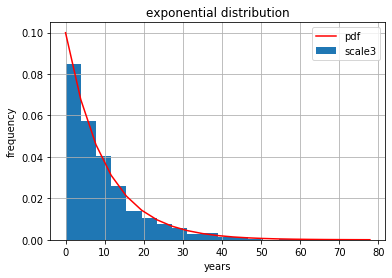

In [24]:
# Lifetime of computer parts. 
# density=True above allows comparison with pdf
scale3 = 10 # mean lifetime in years.
e3 = np.random.exponential(scale3, 1000)
count, bins, ignored = plt.hist(e3, 20, density=True, label='scale3')

exp_pdf = lambda s, x: (1 / s ) * np.exp( - (x / s) )
plt.plot(bins, exp_pdf(scale3, bins), color='r', label='pdf')

plt.title('exponential distribution')
plt.xlabel('years')
plt.ylabel('frequency')
plt.legend()
plt.grid()

In [30]:
# Prob that a part lasts x years or less is shaded part of curve to left of x.
x = 5 # years to check
pxlt = 1 - np.exp(-1 * x / scale3)
print(pxlt)

# Prob that part lasts MORE than x years.
pxgt = 1 - pxlt
pxgt

0.3934693402873666


0.6065306597126334

### 4.4 The xxx distribution

### 4.5 The xxx distribution

***
## 5. The use of seeds in generating pseudorandom numbers

***
Logistic distribution

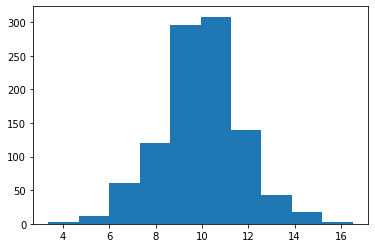

In [26]:
loc, scale = 10, 1
s = np.random.logistic(loc, scale, 1000)
plt.hist(s)
plt.show()

***
Seeds in numpy.random

In [27]:
seed = 1
np.random.RandomState(seed)

In [28]:
## np.random.get_state()